# Using Time Series to predict Malaria Instances

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [215]:
# Autoregressive Integrated Moving Average
# For example you can  predict sales data using ARIMA
# The code below is used to predict Malaria Instances using ARIMA


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

from statsmodels.tsa.stattools import adfuller
# function to calculate MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


# Step 1: read the data

In [217]:
# In TimeSeries Data has to be Regular

In [57]:
df=pd.read_csv('MalariaTimeSeriesData.csv')

In [58]:
df

,Date,MalariaCnt
0,1/31/1998 0:00,244
1,2/28/1998 0:00,562
2,3/31/1998 0:00,312
3,4/30/1998 0:00,269
4,5/31/1998 0:00,101
...,...,...
235,8/31/2017 0:00,539
236,9/30/2017 0:00,1679
237,10/31/2017 0:00,1639
238,11/30/2017 0:00,361


In [59]:
# Convert 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
# Extract year and month
df['Month'] = df['Date'].dt.strftime('%Y-%m')

In [61]:
# Extract only two columns Month and MalariaCnt
df = df[['Month', 'MalariaCnt']]

In [62]:
df

,Month,MalariaCnt
0,1998-01,244
1,1998-02,562
2,1998-03,312
3,1998-04,269
4,1998-05,101
...,...,...
235,2017-08,539
236,2017-09,1679
237,2017-10,1639
238,2017-11,361


In [63]:
df.set_index('Month',inplace=True)

In [64]:
df.head()

,MalariaCnt
Month,
1998-01,244
1998-02,562
1998-03,312
1998-04,269
1998-05,101


In [65]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [66]:
outliers=find_outliers_IQR(df)

In [67]:
outliers.to_csv('Outliers.csv')
outliers

,MalariaCnt
Month,
1998-01,NaN
1998-02,NaN
1998-03,NaN
1998-04,NaN
1998-05,NaN
...,...
2017-08,NaN
2017-09,1679.0
2017-10,1639.0


In [68]:
def non_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   non_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
      
   return non_outliers

In [69]:
df=non_outliers_IQR(df)

In [70]:
df.to_csv('NonOutliers.csv')
df

,MalariaCnt
Month,
1998-01,244.0
1998-02,562.0
1998-03,312.0
1998-04,269.0
1998-05,101.0
...,...
2017-08,539.0
2017-09,NaN
2017-10,NaN


In [71]:
# Find the mean excluding NaN values using DataFrame.mean()
#df2 = df.mean(axis = 0, skipna = True)
#Exclude NA/null values when computing the result.
#malaria_df=malaria_df.dropna()
df = df.fillna(df.mean(axis = 0, skipna = True))

In [14]:
#df=df.reset_index()

In [72]:
df

,MalariaCnt
Month,
1998-01,244.000000
1998-02,562.000000
1998-03,312.000000
1998-04,269.000000
1998-05,101.000000
...,...
2017-08,539.000000
2017-09,204.599099
2017-10,204.599099


In [37]:
#ts = pd.Series(list(df['MalariaCnt']), index=pd.to_datetime(df['Month'],format='%Y-%m'))

In [75]:
ts = df['MalariaCnt']
ts.head(5)

Month
1998-01    244.0
1998-02    562.0
1998-03    312.0
1998-04    269.0
1998-05    101.0
Name: MalariaCnt, dtype: float64

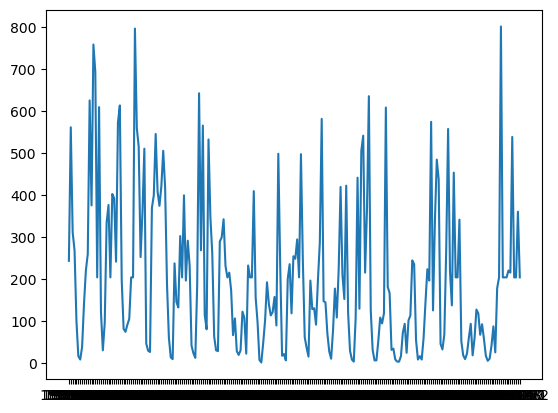

In [76]:
plt.plot(ts)

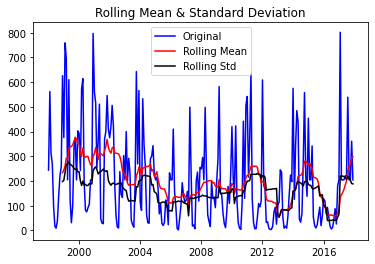

Results of Dickey-Fuller Test:
Test Statistic                  -3.198960
p-value                          0.020045
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


In [234]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts)

In [293]:
-3.198960 > -2.874531

False

In [ ]:
#Trend and seasonality can make a time series non stationary.

#Now, we will do a data transformation in the hope to reduce trend and make our data stationary. 
#We will use a log transformation

In [294]:
ts_log = np.log(ts)
ts_log.head()

Month
1998-01-01    5.497168
1998-02-01    6.331502
1998-03-01    5.743003
1998-04-01    5.594711
1998-05-01    4.615121
Name: MalariaCnt, dtype: float64

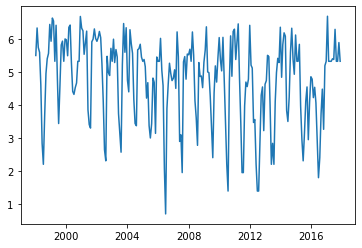

In [295]:
plt.plot(ts_log)

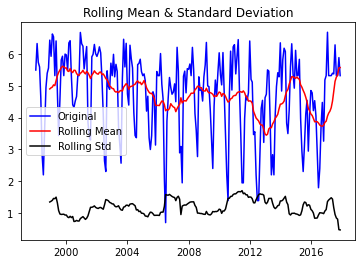

Results of Dickey-Fuller Test:
Test Statistic                  -2.962811
p-value                          0.038516
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


In [296]:
test_stationarity(ts_log)

In [ ]:
#Looking at the chart, the mean is increasing over time while the variance is almost constant.
#The value for Test Statistics is still higher than the Critical Value (1%)
#The value for Test Statistics is  Lower than the Critical Value (5%)
#The value for Test Statistics is  Lower than the Critical Value (10%) 

#the Test Statistics value is less than the 5% Critical Value. 
#This means that we are 95% confident that we can reject the null hypothesis (the series is not stationary).
#Rejecting the null hypothesis would mean that the series is stationary.

p value > 0.05 means data is non-stationary:

# Step 2 : Stationarity check - Modeling

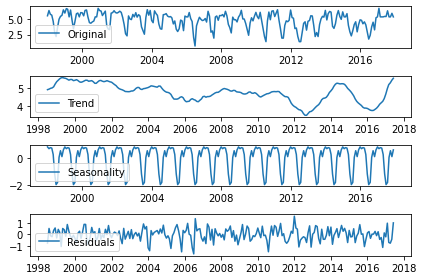

In [297]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

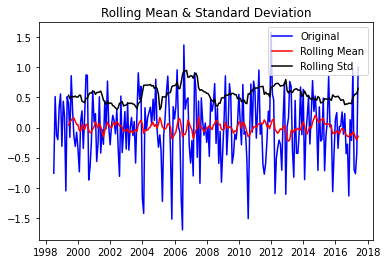

Results of Dickey-Fuller Test:
Test Statistic                -7.530173e+00
p-value                        3.595971e-11
#Lags Used                     1.000000e+01
Number of Observations Used    2.170000e+02
Critical Value (1%)           -3.460849e+00
Critical Value (5%)           -2.874953e+00
Critical Value (10%)          -2.573919e+00
dtype: float64


In [298]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
#The Test statistics is less than the 1% Critical value which means that we are 99% confident to reject the null hypothesis.

In [20]:
#We will now create a model on the time series. For this case, we would use the series from the trasformed data 
#because it is easier to transform it back into the predicted values.

#To create the model, we will use Auto Regressive Integrated Moving Average(ARIMA).
#ARIMA requires 3 parameters (p,d,q). The goal is to find the optimal values for these parameters to find the best model.

#p = the number of AR (Auto-Regressive) terms
#d = The number of differences
#q = the number of MA (Moving-Average) terms


#To know the values for p and q, we can use the Auto correlation Function (ACF) technique and
#the Partial auto correlation (PACF) technique.

# Autocorrelation test
# one order differening to stationarize. Now lets plot ACF and PACF charts 
# for first order log serie

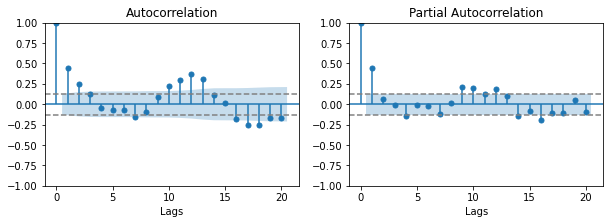

In [299]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))

# ACF chart
fig = sm.graphics.tsa.plot_acf(ts.values.squeeze(), lags=20, ax=ax1)

# draw 95% confidence interval line
ax1.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax1.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax1.set_xlabel('Lags')

# PACF chart
fig = sm.graphics.tsa.plot_pacf(ts, lags=20, ax=ax2)

# draw 95% confidence interval line
ax2.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax2.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax2.set_xlabel('Lags')
plt.show()

In [300]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')


Text(0.5, 1.0, 'Autocorrelation Function')

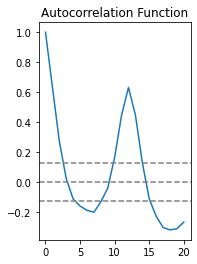

In [301]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

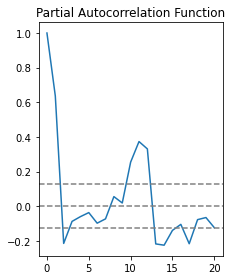

In [302]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [303]:
# build model
model = sm.tsa.ARIMA(ts_log, order=(2,0,2))
results_ARIMA = model.fit() 

ts_predict = results_ARIMA.predict()

In [308]:
# Evaluate model
print ("AIC: ", results_ARIMA.aic)
print ("BIC: ", results_ARIMA.bic)

AIC:  664.2054853435114
BIC:  685.0893188835634


In [309]:
print ("Mean Absolute Error: ", mean_absolute_error(ts_log.values, ts_predict.values))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)) )

Mean Absolute Error:  0.7452059799948271
Root Mean Squared Error:  0.9409988962588121


In [307]:
# check autocorrelation
print ("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

Durbin-Watson statistic : 1.990994390965076


In [310]:
model = sm.tsa.ARIMA(ts_log, order=(2,0,2))
results_ARIMA = model.fit() 

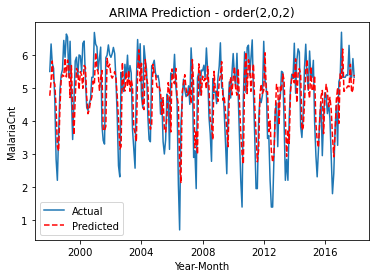

In [312]:
ts_predict = results_ARIMA.predict()
plt.title('ARIMA Prediction - order(2,0,2)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('MalariaCnt')
plt.legend(loc='best')
plt.show()

In [313]:
print ("AIC: ", results_ARIMA.aic)
print ("BIC: ", results_ARIMA.bic)

AIC:  664.2054853435114
BIC:  685.0893188835634


In [314]:
print ("Mean Absolute Error: ", mean_absolute_error(ts_log.values, ts_predict.values))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)) )

# check autocorrelation
print ("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

Mean Absolute Error:  0.7452059799948271
Root Mean Squared Error:  0.9409988962588121
Durbin-Watson statistic : 1.990994390965076


# How to get ARIMA Hyperparameters p d q¶
method ACF PACF plots
Auto_ARIMA function
for loop

In [252]:
import itertools

In [348]:
p=range(0,20)
q=range(0,20)
d=range(0,2) #we dont generaly have to diferentiate more than 2 times

In [349]:
pdq_combination=list(itertools.product(p,d,q))

In [350]:
len(pdq_combination)

800

In [351]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 0, 10),
 (0, 0, 11),
 (0, 0, 12),
 (0, 0, 13),
 (0, 0, 14),
 (0, 0, 15),
 (0, 0, 16),
 (0, 0, 17),
 (0, 0, 18),
 (0, 0, 19),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 1, 10),
 (0, 1, 11),
 (0, 1, 12),
 (0, 1, 13),
 (0, 1, 14),
 (0, 1, 15),
 (0, 1, 16),
 (0, 1, 17),
 (0, 1, 18),
 (0, 1, 19),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 0, 8),
 (1, 0, 9),
 (1, 0, 10),
 (1, 0, 11),
 (1, 0, 12),
 (1, 0, 13),
 (1, 0, 14),
 (1, 0, 15),
 (1, 0, 16),
 (1, 0, 17),
 (1, 0, 18),
 (1, 0, 19),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (1, 1, 9),
 (1, 1, 10),
 (1, 1, 11),
 (1, 1, 12),
 (1, 1, 13),
 (1, 1, 14),
 (1, 1, 15),
 (1, 1, 16),
 (1, 1, 17),
 (1, 1, 18),
 (1, 1, 19),


In [352]:
rmse=[]
order1=[]

In [353]:
for pdq in pdq_combination:
    try:
        model = sm.tsa.ARIMA(ts_log, order=pdq)
        results_ARIMA = model.fit()
        pred=results_ARIMA.predict()
        error=np.sqrt(mean_squared_error(ts_log.values, pred.values))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue
        

In [322]:
results=pd.DataFrame(index=order1,data=rmse, columns=['RMSE'])

In [323]:
results

,RMSE
"(0, 0, 0)",1.257485
"(0, 0, 1)",1.007153
"(0, 0, 2)",0.958972
"(0, 0, 3)",0.946454
"(0, 0, 4)",0.946417
...,...
"(9, 1, 5)",0.883448
"(9, 1, 6)",0.845874
"(9, 1, 7)",0.812167
"(9, 1, 8)",0.825386


In [324]:
results.to_csv('ARIMA_result8.csv')

In [80]:
#(9, 0, 9)

In [325]:
# final model# final  
model = sm.tsa.ARIMA(ts_log, order=(9,0,9))
results_ARIMA = model.fit() 

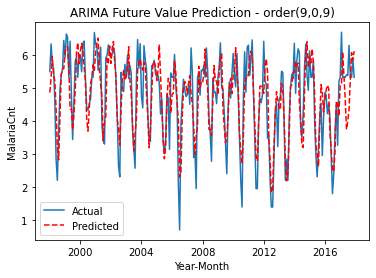

AIC:  580.0379700621556
BIC:  649.6507485289955
Mean Absolute Error:  0.5787644740088534
Root Mean Squared Error:  0.7426863647955668
Durbin-Watson statistic : 1.9175769620255847


In [326]:
ts_predict = results_ARIMA.predict()
plt.title('ARIMA Future Value Prediction - order(9,0,9)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('MalariaCnt')
plt.legend(loc='best')
plt.show()

print ("AIC: ", results_ARIMA.aic)
print ("BIC: ", results_ARIMA.bic)

print ("Mean Absolute Error: ", mean_absolute_error(ts_log.values, ts_predict.values))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)) )

# check autocorrelation
print ("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

In [327]:
predictionsdf=pd.DataFrame({'Actual': ts_log.values, 
              'Predicted': ts_predict.values})

In [328]:
predictionsdf

,Actual,Predicted
0,5.497168,4.857146
1,6.331502,5.303281
2,5.743003,5.951086
3,5.594711,5.401519
4,4.615121,5.215290
...,...,...
235,6.289716,4.344396
236,5.321052,5.277724
237,5.321052,6.068869
238,5.888878,5.841518


In [329]:
sum_actuals = sum_errors = 0

for actual_val, predict_val in zip(predictionsdf['Actual'], predictionsdf['Predicted']):
    abs_error = actual_val - predict_val
    if abs_error < 0:
        abs_error = abs_error * -1

    sum_errors = sum_errors + abs_error
    sum_actuals = sum_actuals + actual_val

mean_abs_percent_error = sum_errors / sum_actuals
print("Model MAPE:")
#print(mean_abs_percent_error * 100)
print(str(round(mean_abs_percent_error * 100)) + '%') 
print()
print("Model Accuracy:")
#print((1 - mean_abs_percent_error)* 100) 
print(str(round((1 - mean_abs_percent_error)* 100)) + '%') 

Model MAPE:
12%

Model Accuracy:
88%


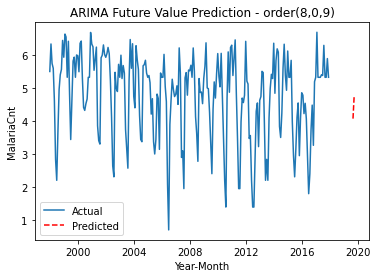

2019-09-01    4.067987
2019-10-01    4.758384
Freq: MS, Name: predicted_mean, dtype: float64


In [339]:
# predict future values
#ts_predict = results_ARIMA.predict('2018-01-31', '2018-02-01')
ts_predict = results_ARIMA.predict('2019-09-01','2019-10-01')
plt.title('ARIMA Future Value Prediction - order(9,0,9)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('MalariaCnt')
plt.legend(loc='best')
plt.show()

print(ts_predict)

In [347]:
df_predictions = pd.DataFrame(round(np.exp(ts_predict),0))

In [346]:
df_predictions

,predicted_mean
2019-09-01,58.0
2019-10-01,117.0


In [137]:
#df_predictions = pd.DataFrame(columns=['Month','Predicted' ])